In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms 
import sklearn as sk

from patsy import dmatrix

import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

import platform
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

C:\Users\LG\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
train = pd.read_csv("train_trans.csv", parse_dates=["pickup_datetime", "dropoff_datetime"])
test = pd.read_csv("test_trans.csv", parse_dates=["pickup_datetime"])

In [3]:
train.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,pickup_weekday,pickup_hour,working_day,distance,bearing,avg_speed_km_h
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,0,778,4,4,13,1,1.225080,240.940662,5.668751
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,0,655,1,6,7,0,6.049836,25.342196,33.251005
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,0,764,4,4,6,1,7.824606,209.211508,36.869870
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,0,373,1,1,15,1,1.092564,35.033294,10.544853
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,0,198,4,1,14,1,1.134042,29.969486,20.618945


3-17. 모든변수 - C(store_and_fwd_flag) & 실수값 스케일링 & pickup_hour 2차 다항회귀 & distance 2, 3, 4차 다항회귀 & speed 추가 & speed 3차 다항회귀 & C(vendor_id) 제거 & pickup_hour 3차 제거 & distance 4차 제거

In [17]:
model17 = sm.OLS.from_formula("np.log1p(trip_duration) ~  C(working_day) + scale(passenger_count) + scale(distance) + scale(I(distance**2)) + scale(I(distance**3)) + scale(bearing) + scale(pickup_month) + scale(pickup_weekday) + scale(pickup_hour) + scale(I(pickup_hour**2)) + scale(pickup_latitude) + scale(pickup_longitude) + scale(dropoff_latitude) + scale(dropoff_longitude) + scale(avg_speed_km_h) + scale(I(avg_speed_km_h**2)) + scale(I(avg_speed_km_h**3)) - 1", train)
result17 = model17.fit()
print(result17.summary())

                               OLS Regression Results                              
Dep. Variable:     np.log1p(trip_duration)   R-squared:                       0.584
Model:                                 OLS   Adj. R-squared:                  0.584
Method:                      Least Squares   F-statistic:                 1.205e+05
Date:                     Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                             00:30:38   Log-Likelihood:            -1.0965e+06
No. Observations:                  1458644   AIC:                         2.193e+06
Df Residuals:                      1458626   BIC:                         2.193e+06
Df Model:                               17                                         
Covariance Type:                 nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

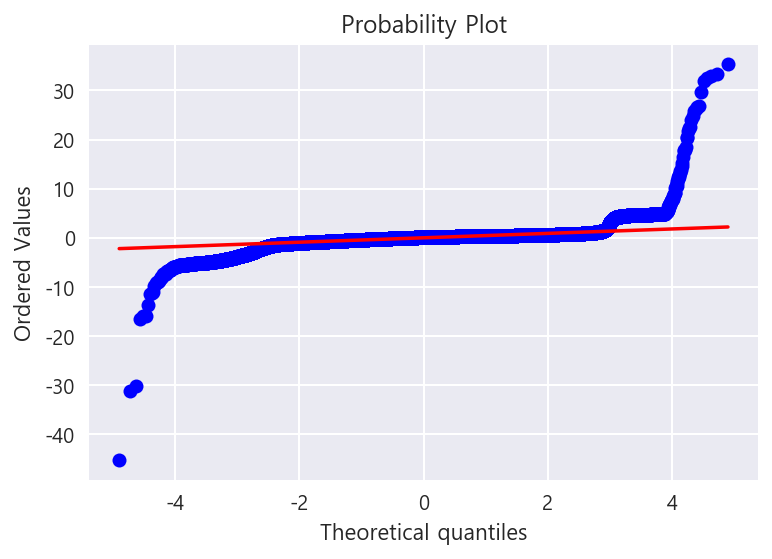

In [18]:
sp.stats.probplot(result17.resid, plot=plt)
plt.show()

3-21. 모든변수 - C(store_and_fwd_flag) & 실수값 스케일링 & pickup_hour 2차 다항회귀 & distance 2, 3, 4차 다항회귀 & speed 추가 & speed 3차 다항회귀 & C(vendor_id) 제거 & pickup_hour 3차 제거 & distance 4차 제거 & pickup_longitude 2차 다항회귀

In [5]:
model21 = sm.OLS.from_formula("np.log1p(trip_duration) ~  C(working_day) + scale(passenger_count) + scale(distance) + scale(I(distance**2)) + scale(I(distance**3)) + scale(bearing) + scale(pickup_month) + scale(pickup_weekday) + scale(pickup_hour) + scale(I(pickup_hour**2)) + scale(pickup_latitude) + scale(pickup_longitude) + scale(I(pickup_longitude**2)) + scale(dropoff_latitude) + scale(dropoff_longitude) + scale(avg_speed_km_h) + scale(I(avg_speed_km_h**2)) + scale(I(avg_speed_km_h**3)) - 1", train)
result21 = model21.fit()
print(result21.summary())

                               OLS Regression Results                              
Dep. Variable:     np.log1p(trip_duration)   R-squared:                       0.591
Model:                                 OLS   Adj. R-squared:                  0.591
Method:                      Least Squares   F-statistic:                 1.173e+05
Date:                     Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                             13:45:40   Log-Likelihood:            -1.0837e+06
No. Observations:                  1458644   AIC:                         2.167e+06
Df Residuals:                      1458625   BIC:                         2.168e+06
Df Model:                               18                                         
Covariance Type:                 nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

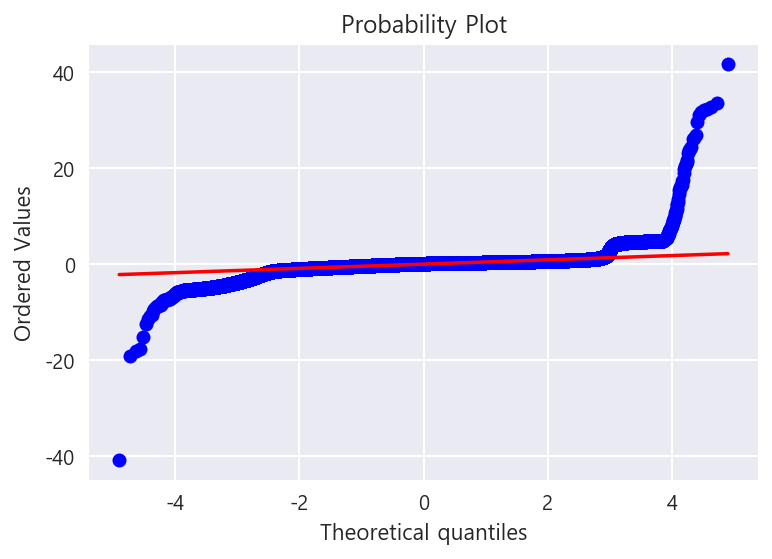

In [16]:
sp.stats.probplot(result21.resid, plot=plt)
plt.show()

In [20]:
result21_2_lasso = model21.fit_regularized(alpha=0.01, L1_wt=1)
print(result21_2_lasso.params)

C(working_day)[0]                  6.393121
C(working_day)[1]                  6.468484
scale(passenger_count)             0.000000
scale(distance)                    0.728328
scale(I(distance ** 2))           -0.139477
scale(I(distance ** 3))            0.000000
scale(bearing)                     0.000000
scale(pickup_month)                0.007108
scale(pickup_weekday)              0.009246
scale(pickup_hour)                 0.000394
scale(I(pickup_hour ** 2))         0.000000
scale(pickup_latitude)             0.027838
scale(pickup_longitude)           -0.038670
scale(I(pickup_longitude ** 2))    0.000000
scale(dropoff_latitude)           -0.006396
scale(dropoff_longitude)           0.000000
scale(avg_speed_km_h)             -0.569946
scale(I(avg_speed_km_h ** 2))      0.364457
scale(I(avg_speed_km_h ** 3))      0.000000
dtype: float64


In [21]:
result21_3_lasso = model21.fit_regularized(alpha=0.005, L1_wt=1)
print(result21_3_lasso.params)

C(working_day)[0]                  6.411425
C(working_day)[1]                  6.475168
scale(passenger_count)             0.004015
scale(distance)                    0.756600
scale(I(distance ** 2))           -0.164717
scale(I(distance ** 3))            0.012594
scale(bearing)                     0.000000
scale(pickup_month)                0.011219
scale(pickup_weekday)              0.011504
scale(pickup_hour)                 0.004982
scale(I(pickup_hour ** 2))         0.000000
scale(pickup_latitude)             0.040129
scale(pickup_longitude)           -0.060274
scale(I(pickup_longitude ** 2))    0.000000
scale(dropoff_latitude)           -0.013687
scale(dropoff_longitude)           0.017268
scale(avg_speed_km_h)             -0.608947
scale(I(avg_speed_km_h ** 2))      0.400639
scale(I(avg_speed_km_h ** 3))      0.000000
dtype: float64


In [22]:
influence21 = result21.get_influence()
hat21 = influence21.hat_matrix_diag
hat21.sum()

19.000000000001098

In [24]:
hat21_mean = hat21.sum() / 1458644

In [25]:
hat21_mean

1.3025796561738916e-05

In [28]:
hat21_3big = hat21[hat21 > (3 * hat21_mean)]

In [29]:
hat21_3big

array([  4.43905875e-05,   8.84587045e-05,   4.78556994e-05, ...,
         5.11131339e-05,   6.41908062e-05,   4.78573785e-05])

In [30]:
len(hat21_3big)

22821

In [31]:
rs_p21 = result21.resid_pearson

In [32]:
rs_p21_3big = rs_p21[rs_p21 > 3]

In [33]:
len(rs_p21_3big)

2670

In [41]:
d21 = {"hat21" : hat21, "rs_p21" : rs_p21}
hat_rs_p_21_df = pd.DataFrame(data = d21, index = train.index.values)

In [42]:
print(hat_rs_p_21_df.shape)
hat_rs_p_21_df.tail()

(1458644, 2)


,hat21,rs_p21
1458639,0.000007,0.325389
1458640,0.000011,0.712673
1458641,0.000014,0.647741
1458642,0.000005,-0.558452
1458643,0.000005,-0.991132


In [64]:
d21_3h3r = {"hat21" : hat21 > (3 * hat21_mean), "rs_p21" : rs_p21 > 3}
hat_rs_p_out_3h3r_21_df = pd.DataFrame(data = d21_3h3r, index = train.index.values)

In [65]:
print(hat_rs_p_out_3h3r_21_df.shape)
hat_rs_p_out_3h3r_21_df.tail()

(1458644, 2)


,hat21,rs_p21
1458639,False,False
1458640,False,False
1458641,False,False
1458642,False,False
1458643,False,False


In [66]:
outlier21_3h3r = hat_rs_p_21_df[hat_rs_p_out_3h3r_21_df]

In [67]:
print(outlier21_3h3r.shape)
outlier21_3h3r.tail()

(1458644, 2)


,hat21,rs_p21
1458639,NaN,NaN
1458640,NaN,NaN
1458641,NaN,NaN
1458642,NaN,NaN
1458643,NaN,NaN


In [70]:
outlier21_3h3r.dropna(how = "any", inplace = True)

In [71]:
outlier21_3h3r

,hat21,rs_p21
1107,0.020323,62.174098
12527,0.000230,5.686852
13046,0.000250,6.691365
24426,0.000042,4.738564
25397,0.000197,5.883289
29062,0.000048,9.101581
31208,0.000049,3.206456
34055,0.000088,3.212416
42950,0.000060,3.009023
47242,0.000051,3.077579


In [74]:
outlier21_3h3r_index = outlier21_3h3r.index

In [75]:
outlier21_3h3r_index

Int64Index([   1107,   12527,   13046,   24426,   25397,   29062,   31208,
              34055,   42950,   47242,
            ...
            1390818, 1395556, 1398157, 1401005, 1401225, 1410545, 1414374,
            1433545, 1439166, 1450818],
           dtype='int64', length=320)

In [77]:
train_out_rm_21_3h3r = train.drop(labels = outlier21_3h3r_index)

In [78]:
train_out_rm_21_3h3r.reset_index(drop=True, inplace=True)

In [85]:
print("{} outliers are omitted from the data.".format(len(outlier21_3h3r_index)))

320 outliers are omitted from the data.


In [7]:
model21_rm = sm.OLS.from_formula("np.log1p(trip_duration) ~  C(working_day) + scale(passenger_count) + scale(distance) + scale(I(distance**2)) + scale(I(distance**3)) + scale(bearing) + scale(pickup_month) + scale(pickup_weekday) + scale(pickup_hour) + scale(I(pickup_hour**2)) + scale(pickup_latitude) + scale(pickup_longitude) + scale(I(pickup_longitude**2)) + scale(dropoff_latitude) + scale(dropoff_longitude) + scale(avg_speed_km_h) + scale(I(avg_speed_km_h**2)) + scale(I(avg_speed_km_h**3)) - 1", train_out_rm_21_3h3r)
result21_rm = model21_rm.fit()
print(result21_rm.summary())

                               OLS Regression Results                              
Dep. Variable:     np.log1p(trip_duration)   R-squared:                       0.689
Model:                                 OLS   Adj. R-squared:                  0.689
Method:                      Least Squares   F-statistic:                 1.794e+05
Date:                     Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                             13:53:24   Log-Likelihood:            -8.8245e+05
No. Observations:                  1458324   AIC:                         1.765e+06
Df Residuals:                      1458305   BIC:                         1.765e+06
Df Model:                               18                                         
Covariance Type:                 nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

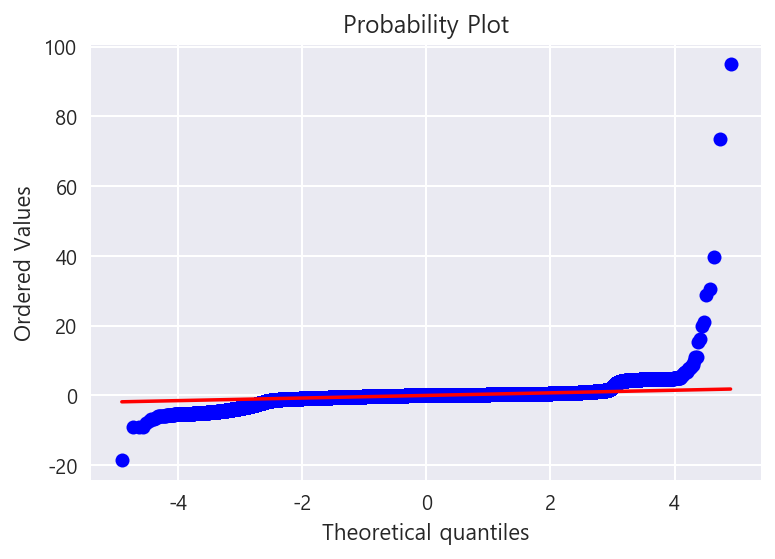

In [95]:
sp.stats.probplot(result21_rm.resid, plot=plt)
plt.show()

In [99]:
result21_rm_lasso = model21_rm.fit_regularized(alpha=0.01, L1_wt=1)
print(result21_rm_lasso.params)

C(working_day)[0]                  6.410297
C(working_day)[1]                  6.461773
scale(passenger_count)             0.000000
scale(distance)                    0.755717
scale(I(distance ** 2))           -0.114010
scale(I(distance ** 3))            0.000000
scale(bearing)                     0.000000
scale(pickup_month)                0.003855
scale(pickup_weekday)              0.005687
scale(pickup_hour)                 0.000000
scale(I(pickup_hour ** 2))         0.000000
scale(pickup_latitude)             0.038477
scale(pickup_longitude)           -0.045275
scale(I(pickup_longitude ** 2))    0.000000
scale(dropoff_latitude)            0.000000
scale(dropoff_longitude)           0.000000
scale(avg_speed_km_h)             -0.538174
scale(I(avg_speed_km_h ** 2))      0.262328
scale(I(avg_speed_km_h ** 3))      0.000000
dtype: float64


In [100]:
result21_rm_lasso2 = model21_rm.fit_regularized(alpha=0.005, L1_wt=1)
print(result21_rm_lasso2.params)

C(working_day)[0]                  6.429142
C(working_day)[1]                  6.468242
scale(passenger_count)             0.002921
scale(distance)                    0.783656
scale(I(distance ** 2))           -0.140776
scale(I(distance ** 3))            0.000000
scale(bearing)                     0.000000
scale(pickup_month)                0.007902
scale(pickup_weekday)              0.007963
scale(pickup_hour)                 0.000000
scale(I(pickup_hour ** 2))         0.000000
scale(pickup_latitude)             0.052783
scale(pickup_longitude)           -0.054284
scale(I(pickup_longitude ** 2))    0.000000
scale(dropoff_latitude)            0.000000
scale(dropoff_longitude)           0.000000
scale(avg_speed_km_h)             -0.571857
scale(I(avg_speed_km_h ** 2))      0.301219
scale(I(avg_speed_km_h ** 3))      0.000000
dtype: float64


In [102]:
result21_rm_lasso3 = model21_rm.fit_regularized(alpha=0.0005, L1_wt=1)
print(result21_rm_lasso3.params)

C(working_day)[0]                  6.446288
C(working_day)[1]                  6.473989
scale(passenger_count)             0.006841
scale(distance)                    0.841246
scale(I(distance ** 2))           -0.514518
scale(I(distance ** 3))            0.310581
scale(bearing)                    -0.035428
scale(pickup_month)                0.011020
scale(pickup_weekday)              0.008739
scale(pickup_hour)                -0.018317
scale(I(pickup_hour ** 2))         0.020997
scale(pickup_latitude)             0.067655
scale(pickup_longitude)           -0.307304
scale(I(pickup_longitude ** 2))   -0.281133
scale(dropoff_latitude)           -0.008271
scale(dropoff_longitude)          -0.031118
scale(avg_speed_km_h)             -0.610833
scale(I(avg_speed_km_h ** 2))      0.549249
scale(I(avg_speed_km_h ** 3))     -0.163525
dtype: float64


In [97]:
# 레버리지 구하기
influence21 = result21.get_influence()
hat21 = influence21.hat_matrix_diag
# 레버리지의 평균 구하기(n = 1458644, n은 데이터의 개수)
hat21_mean = hat21.sum() / 1458644
# 표준화 잔차 구하기
rs_p21 = result21.resid_pearson
# 레버리지와 표준화 잔차로 이루어진 data frame 만들기(index는 train data의 index와 동일)
d21 = {"hat21" : hat21, "rs_p21" : rs_p21}
hat_rs_p_21_df = pd.DataFrame(data = d21, index = train.index.values)
# 레버리지와 표준화 잔차가 각각 일정수준 이상으로 큰 value들은 True로 나오는 data frame 만들기(index는 train data의 index와 동일)
d21_3h3r = {"hat21" : hat21 > (3 * hat21_mean), "rs_p21" : rs_p21 > 3}
hat_rs_p_out_3h3r_21_df = pd.DataFrame(data = d21_3h3r, index = train.index.values)
# 아웃라이어 data(레버리지와 표준화 잔차 둘 다 또는 둘 중 하나가 큰것. 따라서 all을 씀)의 표준화 잔차와 레버리지(index는 재정렬되지 않은 상태)
outlier21_3h3r_any = hat_rs_p_21_df[hat_rs_p_out_3h3r_21_df]
outlier21_3h3r_any.dropna(how = "all", inplace = True)
# outlier의 index 뽑기
outlier21_3h3r_any_index = outlier21_3h3r_any.index
# 뽑은 index로 train data에서 outlier 제거하기
train_out_rm_21_3h3r_any = train.drop(labels = outlier21_3h3r_any_index)
train_out_rm_21_3h3r_any.reset_index(drop=True, inplace=True)
# 몇개의 outlier들이 제거되었는지 print하기
print("{} outliers are omitted from the data.".format(len(outlier21_3h3r_any_index)))

25171 outliers are omitted from the data.


In [98]:
# 레버리지가 3보다 크거나 표준화 잔차가 3보다 큰것들을 outlier들로 봄.
model21_rm_4 = sm.OLS.from_formula("np.log1p(trip_duration) ~  C(working_day) + scale(passenger_count) + scale(distance) + scale(I(distance**2)) + scale(I(distance**3)) + scale(bearing) + scale(pickup_month) + scale(pickup_weekday) + scale(pickup_hour) + scale(I(pickup_hour**2)) + scale(pickup_latitude) + scale(pickup_longitude) + scale(I(pickup_longitude**2)) + scale(dropoff_latitude) + scale(dropoff_longitude) + scale(avg_speed_km_h) + scale(I(avg_speed_km_h**2)) + scale(I(avg_speed_km_h**3)) - 1", train_out_rm_21_3h3r_any)
result21_rm_4 = model21_rm_4.fit()
print(result21_rm_4.summary())

                               OLS Regression Results                              
Dep. Variable:     np.log1p(trip_duration)   R-squared:                       0.883
Model:                                 OLS   Adj. R-squared:                  0.883
Method:                      Least Squares   F-statistic:                 6.021e+05
Date:                     Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                             03:47:33   Log-Likelihood:                -89171.
No. Observations:                  1433473   AIC:                         1.784e+05
Df Residuals:                      1433454   BIC:                         1.786e+05
Df Model:                               18                                         
Covariance Type:                 nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [101]:
# 레버리지가 3보다 크거나 표준화 잔차가 3보다 큰것들을 outlier들로 봄. model21_rm_4에서 dropoff_latitude 뺌 
model21_rm_5 = sm.OLS.from_formula("np.log1p(trip_duration) ~  C(working_day) + scale(passenger_count) + scale(distance) + scale(I(distance**2)) + scale(I(distance**3)) + scale(bearing) + scale(pickup_month) + scale(pickup_weekday) + scale(pickup_hour) + scale(I(pickup_hour**2)) + scale(pickup_latitude) + scale(pickup_longitude) + scale(I(pickup_longitude**2)) + scale(dropoff_longitude) + scale(avg_speed_km_h) + scale(I(avg_speed_km_h**2)) + scale(I(avg_speed_km_h**3)) - 1", train_out_rm_21_3h3r_any)
result21_rm_5 = model21_rm_5.fit()
print(result21_rm_5.summary())

                               OLS Regression Results                              
Dep. Variable:     np.log1p(trip_duration)   R-squared:                       0.883
Model:                                 OLS   Adj. R-squared:                  0.883
Method:                      Least Squares   F-statistic:                 6.375e+05
Date:                     Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                             04:03:12   Log-Likelihood:                -89184.
No. Observations:                  1433473   AIC:                         1.784e+05
Df Residuals:                      1433455   BIC:                         1.786e+05
Df Model:                               17                                         
Covariance Type:                 nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [103]:
# 레버리지가 3보다 크거나 표준화 잔차가 3보다 큰것들을 outlier들로 봄. model21_rm_4에서 dropoff_latitude 뺌. model21_rm_5에서 dropoff_longitude 뺌.
model21_rm_6 = sm.OLS.from_formula("np.log1p(trip_duration) ~  C(working_day) + scale(passenger_count) + scale(distance) + scale(I(distance**2)) + scale(I(distance**3)) + scale(bearing) + scale(pickup_month) + scale(pickup_weekday) + scale(pickup_hour) + scale(I(pickup_hour**2)) + scale(pickup_latitude) + scale(pickup_longitude) + scale(I(pickup_longitude**2)) + scale(avg_speed_km_h) + scale(I(avg_speed_km_h**2)) + scale(I(avg_speed_km_h**3)) - 1", train_out_rm_21_3h3r_any)
result21_rm_6 = model21_rm_6.fit()
print(result21_rm_6.summary())

                               OLS Regression Results                              
Dep. Variable:     np.log1p(trip_duration)   R-squared:                       0.883
Model:                                 OLS   Adj. R-squared:                  0.883
Method:                      Least Squares   F-statistic:                 6.773e+05
Date:                     Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                             04:16:17   Log-Likelihood:                -89215.
No. Observations:                  1433473   AIC:                         1.785e+05
Df Residuals:                      1433456   BIC:                         1.787e+05
Df Model:                               16                                         
Covariance Type:                 nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [104]:
# 레버리지가 3보다 크거나 표준화 잔차가 3보다 큰것들을 outlier들로 봄. model21_rm_4에서 dropoff_latitude 뺌 & dropoff_longitude 뺌. &  + bearing 뺌
model21_rm_7 = sm.OLS.from_formula("np.log1p(trip_duration) ~  C(working_day) + scale(passenger_count) + scale(distance) + scale(I(distance**2)) + scale(I(distance**3)) + scale(pickup_month) + scale(pickup_weekday) + scale(pickup_hour) + scale(I(pickup_hour**2)) + scale(pickup_latitude) + scale(pickup_longitude) + scale(I(pickup_longitude**2)) + scale(avg_speed_km_h) + scale(I(avg_speed_km_h**2)) + scale(I(avg_speed_km_h**3)) - 1", train_out_rm_21_3h3r_any)
result21_rm_7 = model21_rm_7.fit()
print(result21_rm_7.summary())

                               OLS Regression Results                              
Dep. Variable:     np.log1p(trip_duration)   R-squared:                       0.883
Model:                                 OLS   Adj. R-squared:                  0.883
Method:                      Least Squares   F-statistic:                 7.206e+05
Date:                     Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                             04:22:50   Log-Likelihood:                -90779.
No. Observations:                  1433473   AIC:                         1.816e+05
Df Residuals:                      1433457   BIC:                         1.818e+05
Df Model:                               15                                         
Covariance Type:                 nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [6]:
# 레버리지 구하기
influence21 = result21.get_influence()
hat21 = influence21.hat_matrix_diag
# 레버리지의 평균 구하기(n = 1458644, n은 데이터의 개수)
hat21_mean = hat21.sum() / 1458644
# 표준화 잔차 구하기
rs_p21 = result21.resid_pearson
# 레버리지와 표준화 잔차로 이루어진 data frame 만들기(index는 train data의 index와 동일)
d21 = {"hat21" : hat21, "rs_p21" : rs_p21}
hat_rs_p_21_df = pd.DataFrame(data = d21, index = train.index.values)
# 레버리지와 표준화 잔차가 각각 일정수준 이상으로 큰 value들은 True로 나오는 data frame 만들기(index는 train data의 index와 동일)
d21_3h3r = {"hat21" : hat21 > (3 * hat21_mean), "rs_p21" : rs_p21 > 3}
hat_rs_p_out_3h3r_21_df = pd.DataFrame(data = d21_3h3r, index = train.index.values)
# 아웃라이어 data(레버리지와 표준화 잔차 둘 다 큰것. 따라서 any를 씀)의 표준화 잔차와 레버리지(index는 재정렬되지 않은 상태)
outlier21_3h3r = hat_rs_p_21_df[hat_rs_p_out_3h3r_21_df]
outlier21_3h3r.dropna(how = "any", inplace = True)
# outlier의 index 뽑기
outlier21_3h3r_index = outlier21_3h3r.index
# 뽑은 index로 train data에서 outlier 제거하기
train_out_rm_21_3h3r = train.drop(labels = outlier21_3h3r_index)
train_out_rm_21_3h3r.reset_index(drop=True, inplace=True)
# 몇개의 outlier들이 제거되었는지 print하기
print("{} outliers are omitted from the data.".format(len(outlier21_3h3r_index)))

320 outliers are omitted from the data.


# HERE !

In [86]:
# 레버리지 구하기
influence21 = result21.get_influence()
hat21 = influence21.hat_matrix_diag
# 레버리지의 평균 구하기(n = 1458644, n은 데이터의 개수)
hat21_mean = hat21.sum() / 1458644
# 표준화 잔차 구하기
rs_p21 = result21.resid_pearson
# 레버리지와 표준화 잔차로 이루어진 data frame 만들기(index는 train data의 index와 동일)
d21 = {"hat21" : hat21, "rs_p21" : rs_p21}
hat_rs_p_21_df = pd.DataFrame(data = d21, index = train.index.values)
# 레버리지와 표준화 잔차가 각각 일정수준 이상으로 큰 value들은 True로 나오는 data frame 만들기(index는 train data의 index와 동일)
d21_4h4r = {"hat21" : hat21 > (4 * hat21_mean), "rs_p21" : rs_p21 > 4}
hat_rs_p_out_4h4r_21_df = pd.DataFrame(data = d21_4h4r, index = train.index.values)
# 아웃라이어 data(레버리지와 표준화 잔차 둘 다 큰것. 따라서 any를 씀)의 표준화 잔차와 레버리지(index는 재정렬되지 않은 상태)
outlier21_4h4r = hat_rs_p_21_df[hat_rs_p_out_4h4r_21_df]
outlier21_4h4r.dropna(how = "any", inplace = True)
# outlier의 index 뽑기
outlier21_4h4r_index = outlier21_4h4r.index
# 뽑은 index로 train data에서 outlier 제거하기
train_out_rm_21_4h4r = train.drop(labels = outlier21_4h4r_index)
train_out_rm_21_4h4r.reset_index(drop=True, inplace=True)
# 몇개의 outlier들이 제거되었는지 print하기
print("{} outliers are omitted from the data.".format(len(outlier21_4h4r_index)))

147 outliers are omitted from the data.


In [87]:
model21_rm_2 = sm.OLS.from_formula("np.log1p(trip_duration) ~  C(working_day) + scale(passenger_count) + scale(distance) + scale(I(distance**2)) + scale(I(distance**3)) + scale(bearing) + scale(pickup_month) + scale(pickup_weekday) + scale(pickup_hour) + scale(I(pickup_hour**2)) + scale(pickup_latitude) + scale(pickup_longitude) + scale(I(pickup_longitude**2)) + scale(dropoff_latitude) + scale(dropoff_longitude) + scale(avg_speed_km_h) + scale(I(avg_speed_km_h**2)) + scale(I(avg_speed_km_h**3)) - 1", train_out_rm_21_4h4r)
result21_rm_2 = model21_rm_2.fit()
print(result21_rm_2.summary())

                               OLS Regression Results                              
Dep. Variable:     np.log1p(trip_duration)   R-squared:                       0.688
Model:                                 OLS   Adj. R-squared:                  0.688
Method:                      Least Squares   F-statistic:                 1.788e+05
Date:                     Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                             03:00:44   Log-Likelihood:            -8.8530e+05
No. Observations:                  1458497   AIC:                         1.771e+06
Df Residuals:                      1458478   BIC:                         1.771e+06
Df Model:                               18                                         
Covariance Type:                 nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [88]:
# 레버리지 구하기
influence21 = result21.get_influence()
hat21 = influence21.hat_matrix_diag
# 레버리지의 평균 구하기(n = 1458644, n은 데이터의 개수)
hat21_mean = hat21.sum() / 1458644
# 표준화 잔차 구하기
rs_p21 = result21.resid_pearson
# 레버리지와 표준화 잔차로 이루어진 data frame 만들기(index는 train data의 index와 동일)
d21 = {"hat21" : hat21, "rs_p21" : rs_p21}
hat_rs_p_21_df = pd.DataFrame(data = d21, index = train.index.values)
# 레버리지와 표준화 잔차가 각각 일정수준 이상으로 큰 value들은 True로 나오는 data frame 만들기(index는 train data의 index와 동일)
d21_2h2r = {"hat21" : hat21 > (2 * hat21_mean), "rs_p21" : rs_p21 > 2}
hat_rs_p_out_2h2r_21_df = pd.DataFrame(data = d21_2h2r, index = train.index.values)
# 아웃라이어 data(레버리지와 표준화 잔차 둘 다 큰것. 따라서 any를 씀)의 표준화 잔차와 레버리지(index는 재정렬되지 않은 상태)
outlier21_2h2r = hat_rs_p_21_df[hat_rs_p_out_2h2r_21_df]
outlier21_2h2r.dropna(how = "any", inplace = True)
# outlier의 index 뽑기
outlier21_2h2r_index = outlier21_2h2r.index
# 뽑은 index로 train data에서 outlier 제거하기
train_out_rm_21_2h2r = train.drop(labels = outlier21_2h2r_index)
train_out_rm_21_2h2r.reset_index(drop=True, inplace=True)
# 몇개의 outlier들이 제거되었는지 print하기

In [89]:
print("{} outliers are omitted from the data.".format(len(outlier21_2h2r_index)))

923 outliers are omitted from the data.


In [90]:
model21_rm_3 = sm.OLS.from_formula("np.log1p(trip_duration) ~  C(working_day) + scale(passenger_count) + scale(distance) + scale(I(distance**2)) + scale(I(distance**3)) + scale(bearing) + scale(pickup_month) + scale(pickup_weekday) + scale(pickup_hour) + scale(I(pickup_hour**2)) + scale(pickup_latitude) + scale(pickup_longitude) + scale(I(pickup_longitude**2)) + scale(dropoff_latitude) + scale(dropoff_longitude) + scale(avg_speed_km_h) + scale(I(avg_speed_km_h**2)) + scale(I(avg_speed_km_h**3)) - 1", train_out_rm_21_2h2r)
result21_rm_3 = model21_rm_3.fit()
print(result21_rm_3.summary())

                               OLS Regression Results                              
Dep. Variable:     np.log1p(trip_duration)   R-squared:                       0.690
Model:                                 OLS   Adj. R-squared:                  0.690
Method:                      Least Squares   F-statistic:                 1.799e+05
Date:                     Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                             03:14:07   Log-Likelihood:            -8.7810e+05
No. Observations:                  1457721   AIC:                         1.756e+06
Df Residuals:                      1457702   BIC:                         1.756e+06
Df Model:                               18                                         
Covariance Type:                 nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

------------------------

### OLSs with Weather Data

In [6]:
train_trans_plus_weather = pd.read_csv("weather_imp_plus_train_trans.csv", parse_dates=["pickup_datetime", "dropoff_datetime"])
test_trans_plus_weather = pd.read_csv("weather_imp_plus_test_trans.csv", parse_dates=["pickup_datetime"])

3-18. 모든변수 - C(store_and_fwd_flag) & 실수값 스케일링 & pickup_hour 2차 다항회귀 & distance 2, 3, 4차 다항회귀 & speed 추가 & speed 3차 다항회귀 & C(vendor_id) 제거 & pickup_hour 3차 제거 & distance 4차 제거 & scaled_temp 추가

In [7]:
model18 = sm.OLS.from_formula("np.log1p(trip_duration) ~  C(working_day) + scale(passenger_count) + scale(distance) + scale(I(distance**2)) + scale(I(distance**3)) + scale(bearing) + scale(pickup_month) + scale(pickup_weekday) + scale(pickup_hour) + scale(I(pickup_hour**2)) + scale(pickup_latitude) + scale(pickup_longitude) + scale(dropoff_latitude) + scale(dropoff_longitude) + scale(avg_speed_km_h) + scale(I(avg_speed_km_h**2)) + scale(I(avg_speed_km_h**3)) + scaled_temp - 1", train_trans_plus_weather)
result18 = model18.fit()
print(result18.summary())

                               OLS Regression Results                              
Dep. Variable:     np.log1p(trip_duration)   R-squared:                       0.584
Model:                                 OLS   Adj. R-squared:                  0.584
Method:                      Least Squares   F-statistic:                 1.128e+05
Date:                     Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                             23:45:26   Log-Likelihood:            -1.0878e+06
No. Observations:                  1446612   AIC:                         2.176e+06
Df Residuals:                      1446593   BIC:                         2.176e+06
Df Model:                               18                                         
Covariance Type:                 nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

3-19. 모든변수 - C(store_and_fwd_flag) & 실수값 스케일링 & pickup_hour 2차 다항회귀 & distance 2, 3, 4차 다항회귀 & speed 추가 & speed 3차 다항회귀 & C(vendor_id) 제거 & pickup_hour 3차 제거 & distance 4차 제거 & scaled_temp 추가 & scaled_visibility추가

In [8]:
model19 = sm.OLS.from_formula("np.log1p(trip_duration) ~  C(working_day) + scale(passenger_count) + scale(distance) + scale(I(distance**2)) + scale(I(distance**3)) + scale(bearing) + scale(pickup_month) + scale(pickup_weekday) + scale(pickup_hour) + scale(I(pickup_hour**2)) + scale(pickup_latitude) + scale(pickup_longitude) + scale(dropoff_latitude) + scale(dropoff_longitude) + scale(avg_speed_km_h) + scale(I(avg_speed_km_h**2)) + scale(I(avg_speed_km_h**3)) + scaled_temp + scaled_visibility- 1", train_trans_plus_weather)
result19 = model19.fit()
print(result19.summary())

                               OLS Regression Results                              
Dep. Variable:     np.log1p(trip_duration)   R-squared:                       0.584
Model:                                 OLS   Adj. R-squared:                  0.584
Method:                      Least Squares   F-statistic:                 1.036e+05
Date:                     Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                             23:54:45   Log-Likelihood:            -1.0514e+06
No. Observations:                  1402047   AIC:                         2.103e+06
Df Residuals:                      1402027   BIC:                         2.103e+06
Df Model:                               19                                         
Covariance Type:                 nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

3-20. 모든변수 - C(store_and_fwd_flag) & 실수값 스케일링 & pickup_hour 2차 다항회귀 & distance 2, 3, 4차 다항회귀 & speed 추가 & speed 3차 다항회귀 & C(vendor_id) 제거 & pickup_hour 3차 제거 & distance 4차 제거 & scaled_temp 추가 & scaled_visibility 추가 & scaled_precip 추가

In [9]:
model20 = sm.OLS.from_formula("np.log1p(trip_duration) ~  C(working_day) + scale(passenger_count) + scale(distance) + scale(I(distance**2)) + scale(I(distance**3)) + scale(bearing) + scale(pickup_month) + scale(pickup_weekday) + scale(pickup_hour) + scale(I(pickup_hour**2)) + scale(pickup_latitude) + scale(pickup_longitude) + scale(dropoff_latitude) + scale(dropoff_longitude) + scale(avg_speed_km_h) + scale(I(avg_speed_km_h**2)) + scale(I(avg_speed_km_h**3)) + scaled_temp + scaled_visibility + scaled_precip - 1", train_trans_plus_weather)
result20 = model20.fit()
print(result20.summary())

                               OLS Regression Results                              
Dep. Variable:     np.log1p(trip_duration)   R-squared:                       0.584
Model:                                 OLS   Adj. R-squared:                  0.584
Method:                      Least Squares   F-statistic:                 9.837e+04
Date:                     Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                             00:09:02   Log-Likelihood:            -1.0514e+06
No. Observations:                  1402047   AIC:                         2.103e+06
Df Residuals:                      1402026   BIC:                         2.103e+06
Df Model:                               20                                         
Covariance Type:                 nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

3-23. 모든변수 - C(store_and_fwd_flag) & 실수값 스케일링 & pickup_hour 2차 다항회귀 & distance 2, 3, 4차 다항회귀 & speed 추가 & speed 3차 다항회귀 & C(vendor_id) 제거 & pickup_hour 3차 제거 & distance 4차 제거 & pickup_longitude 2차 다항회귀 & scaled_temp 추가 & scaled_visibility 추가 & scaled_precip 추가

In [10]:
model23 = sm.OLS.from_formula("np.log1p(trip_duration) ~  C(working_day) + scale(passenger_count) + scale(distance) + scale(I(distance**2)) + scale(I(distance**3)) + scale(bearing) + scale(pickup_month) + scale(pickup_weekday) + scale(pickup_hour) + scale(I(pickup_hour**2)) + scale(pickup_latitude) + scale(pickup_longitude) + scale(I(pickup_longitude**2)) + scale(dropoff_latitude) + scale(dropoff_longitude) + scale(avg_speed_km_h) + scale(I(avg_speed_km_h**2)) + scale(I(avg_speed_km_h**3)) - 1", train)
result23 = model23.fit()
print(result23.summary())

                               OLS Regression Results                              
Dep. Variable:     np.log1p(trip_duration)   R-squared:                       0.591
Model:                                 OLS   Adj. R-squared:                  0.591
Method:                      Least Squares   F-statistic:                 1.173e+05
Date:                     Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                             00:13:46   Log-Likelihood:            -1.0837e+06
No. Observations:                  1458644   AIC:                         2.167e+06
Df Residuals:                      1458625   BIC:                         2.168e+06
Df Model:                               18                                         
Covariance Type:                 nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [ ]:
imp = mice.MICEData(data)
fml = 'y ~ x1 + x2 + x3 + x4'
mice = mice.MICE(fml, sm.OLS, imp)
results = mice.fit(10, 10)
print(results.summary())

------------------------

### submission

In [91]:
z_test = result21_rm_3.predict(test)

In [92]:
len(z_test)

625134

In [93]:
y_test = np.exp(z_test) - 1
len(y_test)

625134

In [94]:
submission = pd.DataFrame({"id": test.id, "trip_duration": y_test})
submission.to_csv("submission21_rm_3.csv", index = False)

### submission result from the model with weather data

In [11]:
z_test_weather = result20.predict(test_trans_plus_weather)

In [12]:
len(z_test_weather)

625134

In [14]:
y_test_weather = np.exp(z_test_weather) - 1
len(y_test_weather)

625134

In [15]:
submission_weather = pd.DataFrame({"id": test_trans_plus_weather.id, "trip_duration": y_test_weather})
submission_weather.to_csv("submission_weather20.csv", index = False)